In [16]:
import os
import urllib.request
import tarfile
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words as nltk_words

nltk.download('stopwords')
nltk.download('words')

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
download_path = "aclImdb_v1.tar.gz"
extract_path = "aclImdb"

if not os.path.exists(download_path):
    urllib.request.urlretrieve(url, download_path)

if not os.path.exists(extract_path):
    with tarfile.open(download_path, 'r:gz') as tar:
        tar.extractall(path=extract_path)

def load_imdb_reviews(data_dir, subset='train', sentiment='pos'):
    reviews = []
    dir_path = os.path.join(data_dir, "aclImdb", subset, sentiment)
    for filename in os.listdir(dir_path):
        if filename.endswith('.txt'):
            with open(os.path.join(dir_path, filename), 'r', encoding='utf-8') as f:
                reviews.append(f.read())
    return ' '.join(reviews)

positive_reviews_text = load_imdb_reviews(extract_path, subset='train', sentiment='pos')

# Preprocess the text data
def preprocess_text(text):
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # keep only letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # convert to lowercase
    text = text.lower()  
    
    # remove stopwords
    words = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # filter out non-English words
    english_words = set(nltk_words.words())
    english_filtered_words = [word for word in filtered_words if word in english_words]
    
    return ' '.join(english_filtered_words)

cleaned_text = preprocess_text(positive_reviews_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


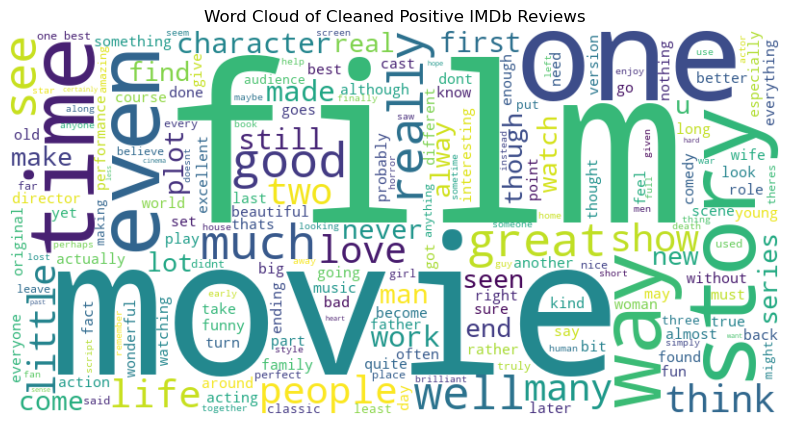

In [18]:
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    max_words=200,
    contour_width=3,
    contour_color='steelblue'
).generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Positive IMDb Reviews')
plt.show()

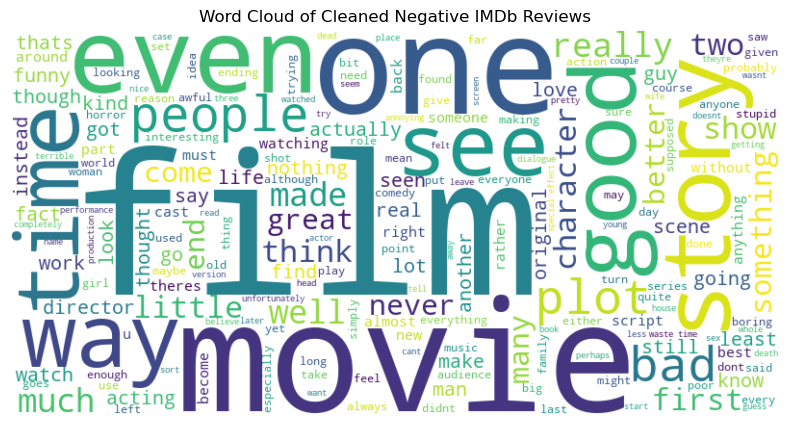

In [19]:
negative_reviews_text = load_imdb_reviews(extract_path, subset='train', sentiment='neg')

cleaned_negative_text = preprocess_text(negative_reviews_text)

negative_wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    max_words=200,
    contour_width=3,
    contour_color='steelblue'
).generate(cleaned_negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Negative IMDb Reviews')
plt.show()